In [1]:
import pandas as pd
import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

In [2]:
def import_VCF4_to_pandas(vcf_file, sep='\t'):
    with open(vcf_file) as f:
        first_line = f.readline().strip()
    if first_line.endswith('VCFv4.0'):
        #Use first line as header
        dataframe = pd.read_csv(vcf_file, sep=sep, skiprows=[16], header=16)
        dataframe[['DP', 'AF', 'SB', 'DP4']] = dataframe['INFO'].str.split(r';.{1,3}=', expand=True)
        dataframe.DP = dataframe.DP.str.split('=').str[1]
        """
        DF4 = Number of :
        1) forward ref alleles; 
        2) reverse ref; 
        3) forward non-ref; 
        4) reverse non-ref alleles, used in variant calling. 
        Sum can be smaller than DP because low-quality bases are not counted.
        """
        dataframe[['Fref', 'Rref', 'Fsample', 'Rsample']] = dataframe['DP4'].str.split(',', expand=True)
        dataframe[['DP', 'AF', 'SB','Fref', 'Rref', 'Fsample', 'Rsample']] = dataframe[['DP', 'AF', 'SB','Fref', 'Rref', 'Fsample', 'Rsample']].astype(float)
    return dataframe

def replace_nucleotide(list_fasta, postition, nucleotide):
    list_fasta[postition] = nucleotide

#def replace_fasta_sequence(fasta, Nref, Nalt, position)


def replace_fasta_sequence(fasta, Nref_list, Nalt_list, position):
    
    fasta_to_replace = SeqIO.read(fasta,"fasta")
    sequence_to_replace = fasta_to_replace.seq
    sequence_list = list(sequence_to_replace)
    
    for index in range (len(position)):

        nucleotide_list = ['A','T','C','G']
        
        Nref = Nref_list[index]
        Nalt = Nalt_list[index]
    
        if Nref in nucleotide_list:
            nucleotide_list.remove(Nref)
        if Nalt in nucleotide_list:
            nucleotide_list.remove(Nalt)
        
        
        base_to_replace_with = nucleotide_list[0]

        
        sequence_list[position[index] - 1] = base_to_replace_with
        
    return "".join(sequence_list)
    #print(record_to_chop.seq[0:4])

In [3]:
vcf_PAIR15050='test/17171479.vcf'
vcf_PAIR18020='test/17160843.vcf'
vcf_PAIR19010='test/17152627.vcf'


reference="data/MTB_ancestorII_reference.fas"

fasta_to_replace = SeqIO.read(reference,"fasta")

sample_name = "PAIR1_50_50"

vcf_PAIR15050_df = import_VCF4_to_pandas(vcf_PAIR15050)
vcf_PAIR18020_df = import_VCF4_to_pandas(vcf_PAIR18020)
vcf_PAIR19010_df = import_VCF4_to_pandas(vcf_PAIR19010)


new_reference_seq = replace_fasta_sequence(reference,vcf_PAIR15050_df['REF'],vcf_PAIR15050_df['ALT'],vcf_PAIR15050_df['POS'])
new_reference_id = "%s_%s" % (fasta_to_replace.id, sample_name)

Output_new_reference = "Ancestor_PAIR15050.fasta"

#Create seqIO object
new_reference = SeqRecord(Seq(new_reference_seq), id = new_reference_id, description = "")


with open(Output_new_reference, "w") as output_handle:
    SeqIO.write(new_reference, output_handle, "fasta")

In [4]:
print(fasta_to_replace.seq[0:41])

TTGACCGATGACCCCGGTTCAGGCTTCACCACAGTGTGGAA


In [5]:
print(new_reference_seq[0:41])

TTGACCGATGACCCCGGTTCAGGCTTCACCACAGTGTGGAA


In [6]:
vcf_PAIR15050_df.head(10)

#CHROM    POS ID REF ALT  QUAL FILTER  \
0  MTB_anc   2532  .   C   T   762   PASS   
1  MTB_anc   6140  .   G   T  1557   PASS   
2  MTB_anc   9143  .   C   T  3392   PASS   
3  MTB_anc  11370  .   C   T  1338   PASS   
4  MTB_anc  13460  .   G   A  3606   PASS   
5  MTB_anc  14251  .   G   A   880   PASS   
6  MTB_anc  14401  .   G   A  2683   PASS   
7  MTB_anc  15117  .   G   C  5013   PASS   
8  MTB_anc  17608  .   G   C  1059   PASS   
9  MTB_anc  23174  .   A   C  2877   PASS   

                                      INFO     DP        AF   SB          DP4  \
0      DP=24;AF=0.958333;SB=0;DP4=0,0,14,9   24.0  0.958333  0.0     0,0,14,9   
1  DP=112;AF=0.482143;SB=5;DP4=23,34,28,26  112.0  0.482143  5.0  23,34,28,26   
2    DP=100;AF=1.000000;SB=0;DP4=0,0,56,44  100.0  1.000000  0.0    0,0,56,44   
3  DP=126;AF=0.428571;SB=4;DP4=37,34,23,31  126.0  0.428571  4.0  37,34,23,31   
4    DP=105;AF=1.000000;SB=0;DP4=0,0,50,55  105.0  1.000000  0.0    0,0,50,55   
5   DP=79;AF=0.531646;SB=0;DP4=20,16,23,19   79.0  0.531646  0.0  20,16,23,19   
6     DP=89;AF=0.977528;SB=0;DP4=0,0,49,38   89.0  0.977528  0.0    0,0,49,38   
7    DP=140;AF=1.000000;SB=0;DP4=0,0,65,75  140.0  1.000000  0.0    0,0,65,75   
8   DP=87;AF=0.505747;SB=0;DP4=17,24,18,26   87.0  0.505747  0.0  17,24,18,26   
9     DP=83;AF=1.000000;SB=0;DP4=0,0,46,37   83.0  1.000000  0.0    0,0,46,37   

   Fref  Rref  Fsample  Rsample  
0   0.0   0.0     14.0      9.0  
1  23.0  34.0     28.0     26.0  
2   0.0   0.0     56.0     44.0  
3  37.0  34.0     23.0     31.0  
4   0.0   0.0     50.0     55.0  
5  20.0  16.0     23.0     19.0  
6   0.0   0.0     49.0     38.0  
7   0.0   0.0     65.0     75.0  
8  17.0  24.0     18.0     26.0  
9   0.0   0.0     46.0     37.0

In [7]:
vcf_PAIR15050_df.dtypes

#CHROM      object
POS          int64
ID          object
REF         object
ALT         object
QUAL         int64
FILTER      object
INFO        object
DP         float64
AF         float64
SB         float64
DP4         object
Fref       float64
Rref       float64
Fsample    float64
Rsample    float64
dtype: object

In [8]:
vcf_PAIR15050_df.head(5)

#CHROM    POS ID REF ALT  QUAL FILTER  \
0  MTB_anc   2532  .   C   T   762   PASS   
1  MTB_anc   6140  .   G   T  1557   PASS   
2  MTB_anc   9143  .   C   T  3392   PASS   
3  MTB_anc  11370  .   C   T  1338   PASS   
4  MTB_anc  13460  .   G   A  3606   PASS   

                                      INFO     DP        AF   SB          DP4  \
0      DP=24;AF=0.958333;SB=0;DP4=0,0,14,9   24.0  0.958333  0.0     0,0,14,9   
1  DP=112;AF=0.482143;SB=5;DP4=23,34,28,26  112.0  0.482143  5.0  23,34,28,26   
2    DP=100;AF=1.000000;SB=0;DP4=0,0,56,44  100.0  1.000000  0.0    0,0,56,44   
3  DP=126;AF=0.428571;SB=4;DP4=37,34,23,31  126.0  0.428571  4.0  37,34,23,31   
4    DP=105;AF=1.000000;SB=0;DP4=0,0,50,55  105.0  1.000000  0.0    0,0,50,55   

   Fref  Rref  Fsample  Rsample  
0   0.0   0.0     14.0      9.0  
1  23.0  34.0     28.0     26.0  
2   0.0   0.0     56.0     44.0  
3  37.0  34.0     23.0     31.0  
4   0.0   0.0     50.0     55.0

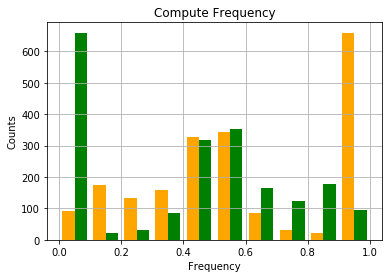

In [9]:
x = vcf_PAIR15050_df['AF']
reference = 1 - vcf_PAIR15050_df['AF']

plt.xlabel('Frequency')
plt.ylabel('Counts')
plt.title('Compute Frequency')
plt.grid(True)

plt.hist([x, reference], color=['orange', 'green']) 
plt.show()

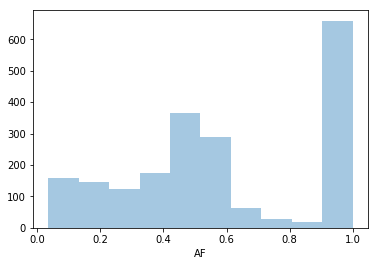

In [10]:
x = vcf_PAIR15050_df['AF']
espejo = 1 -vcf_PAIR15050_df['AF']

sns.distplot(x, kde=False, rug=False)
#sns.distplot(espejo, kde=False, rug=False)

In [11]:
vcf_PAIR15050_df['AF'].mean(axis = 0) 

0.5953203743209877

In [12]:
def scatter_vcf(vcf_df):
    y = vcf_df['AF'][vcf_df['AF'] < 1]
    x = vcf_df['AF'][vcf_df['AF'] < 1].index.values
    
    mean = vcf_df['AF'].mean(axis = 0)
    
    col_mean = np.where(vcf_df['AF'][vcf_df['AF'] < 1] > mean,'c','r')
    
    plt.figure(figsize=(50,20))
    plt.margins(x=0.01, y=0.01, tight=True)

    plt.xlabel('Frequency')
    plt.ylabel('Counts')
    plt.title('Compute Frequency')
    plt.grid(True)
    

    plt.scatter(x, y, color=col_mean, alpha=0.5, s=200) # colormap='jet'
    plt.show()
    

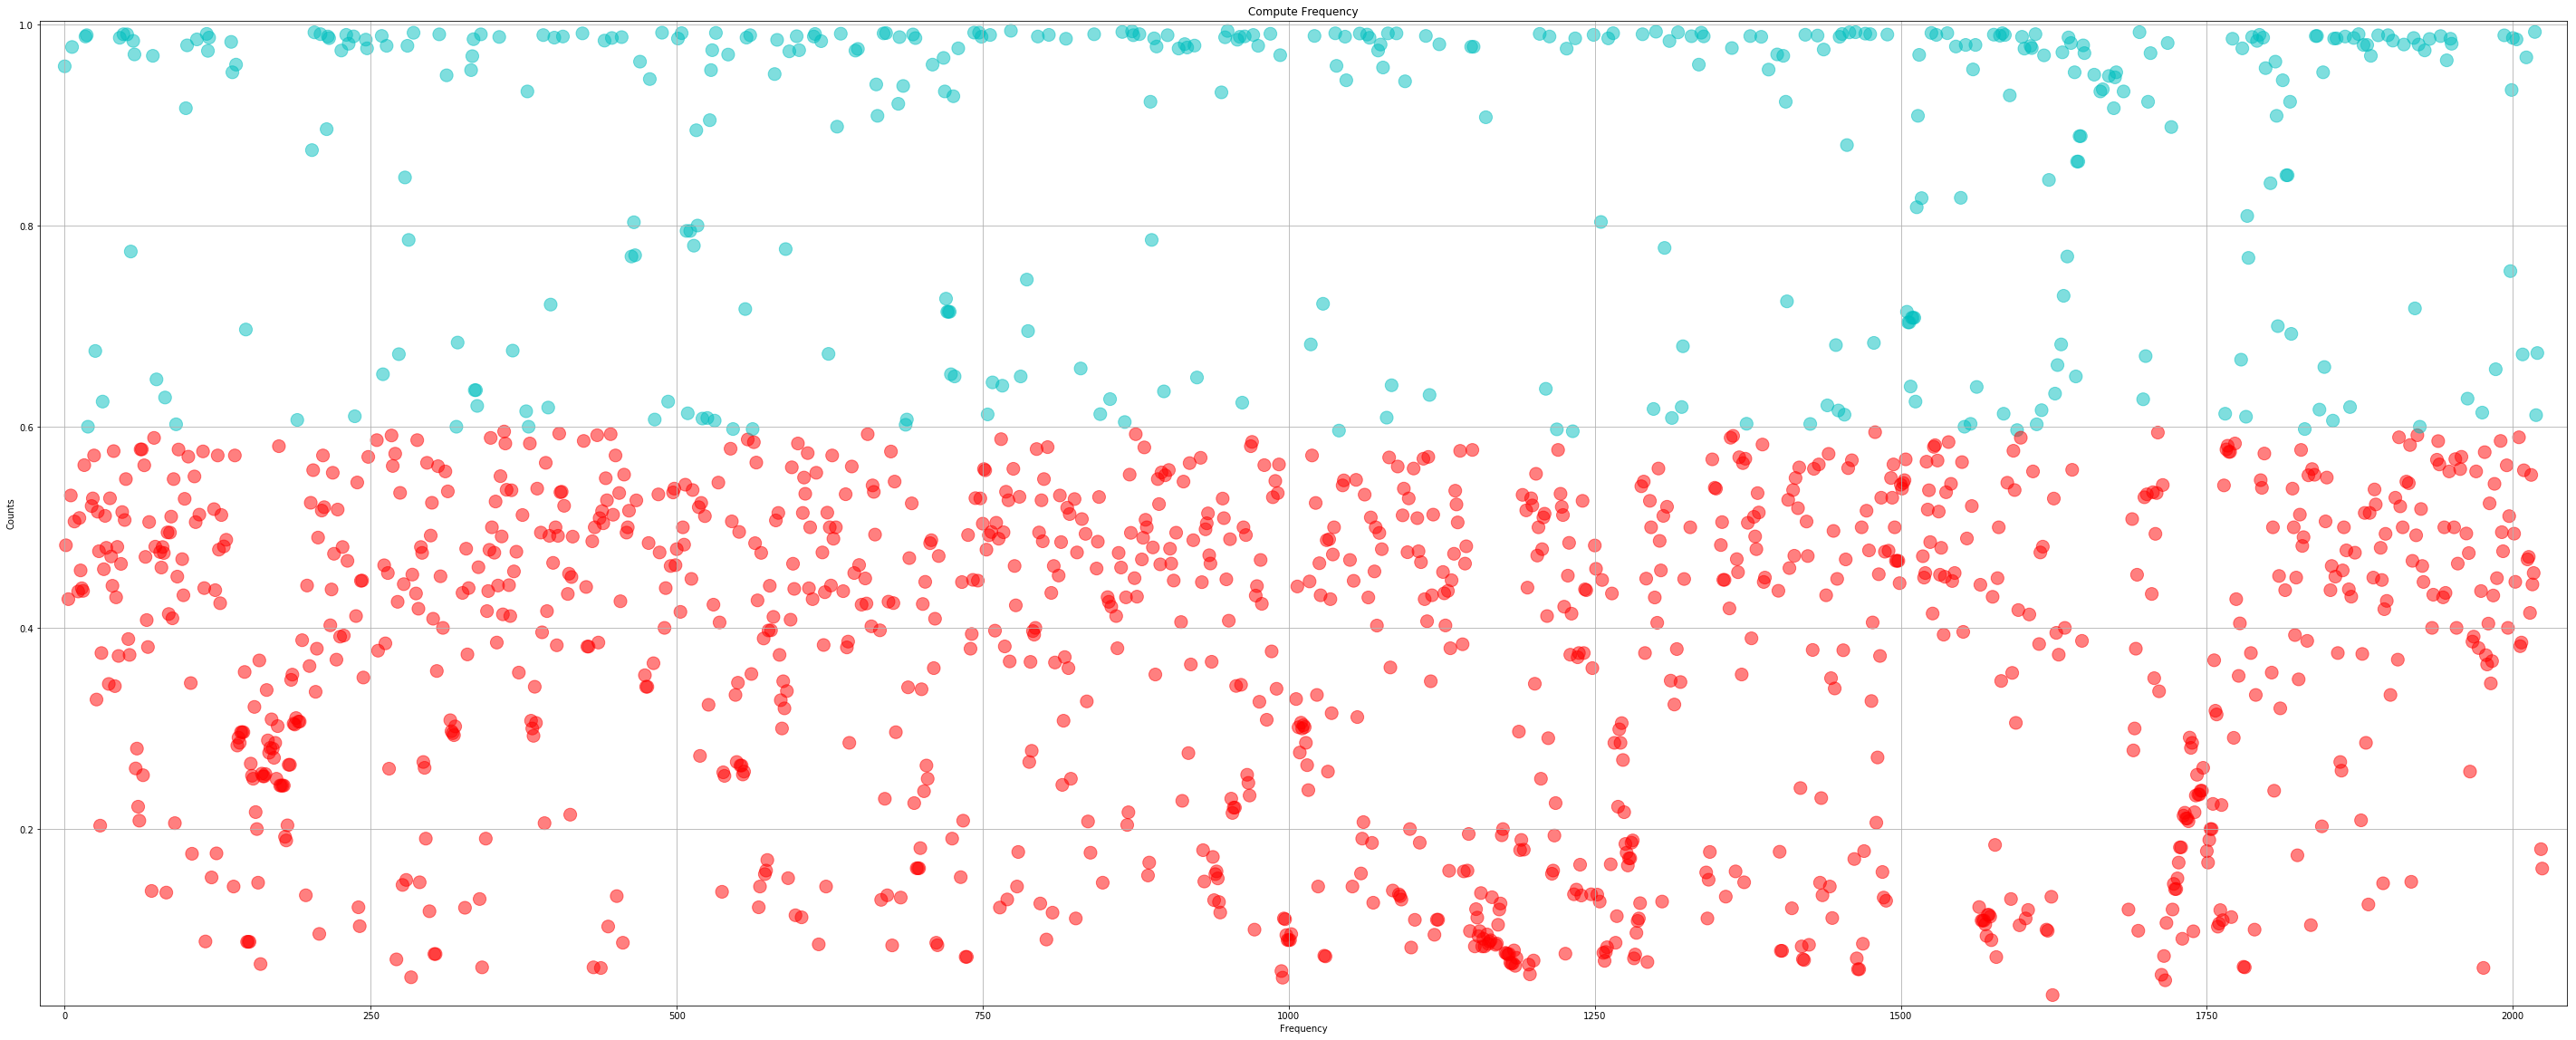

In [13]:
scatter_vcf(vcf_PAIR15050_df)

In [16]:
def scatter_vcf_pos(vcf_df):
    y = vcf_df['AF'][vcf_df['AF'] < 1]
    x = vcf_df['POS'][vcf_df['AF'] < 1]
    plt.figure(figsize=(100,25))
    plt.margins(x=0.01, y=0.01, tight=True)
    
    mean = vcf_df['AF'][vcf_df['AF'] < 1].mean(axis = 0)
    
    col_mean = np.where(vcf_df['AF'][vcf_df['AF'] < 1] > mean,'c','salmon')

    plt.xlabel('Frequency')
    plt.ylabel('Counts')
    plt.title('Compute Frequency')
    
    # Turn on the minor TICKS, which are required for the minor GRID
    plt.minorticks_on()

    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='1', color='k')
    # Customize the minor grid
    plt.grid(which='minor', linestyle=':', linewidth='1', color='k')
    
    # Turn on/off the display of all ticks.
    #plt.tick_params(which='minor', # Options for both major and minor ticks
    #            top='off', # turn off top ticks
    #            left='off', # turn off left ticks
    #            right='off',  # turn off right ticks
    #            bottom='on') # turn on bottom ticks
    #plt.grid(True)

    plt.scatter(x, y, color=col_mean, alpha=0.5, s=300)
    plt.show()

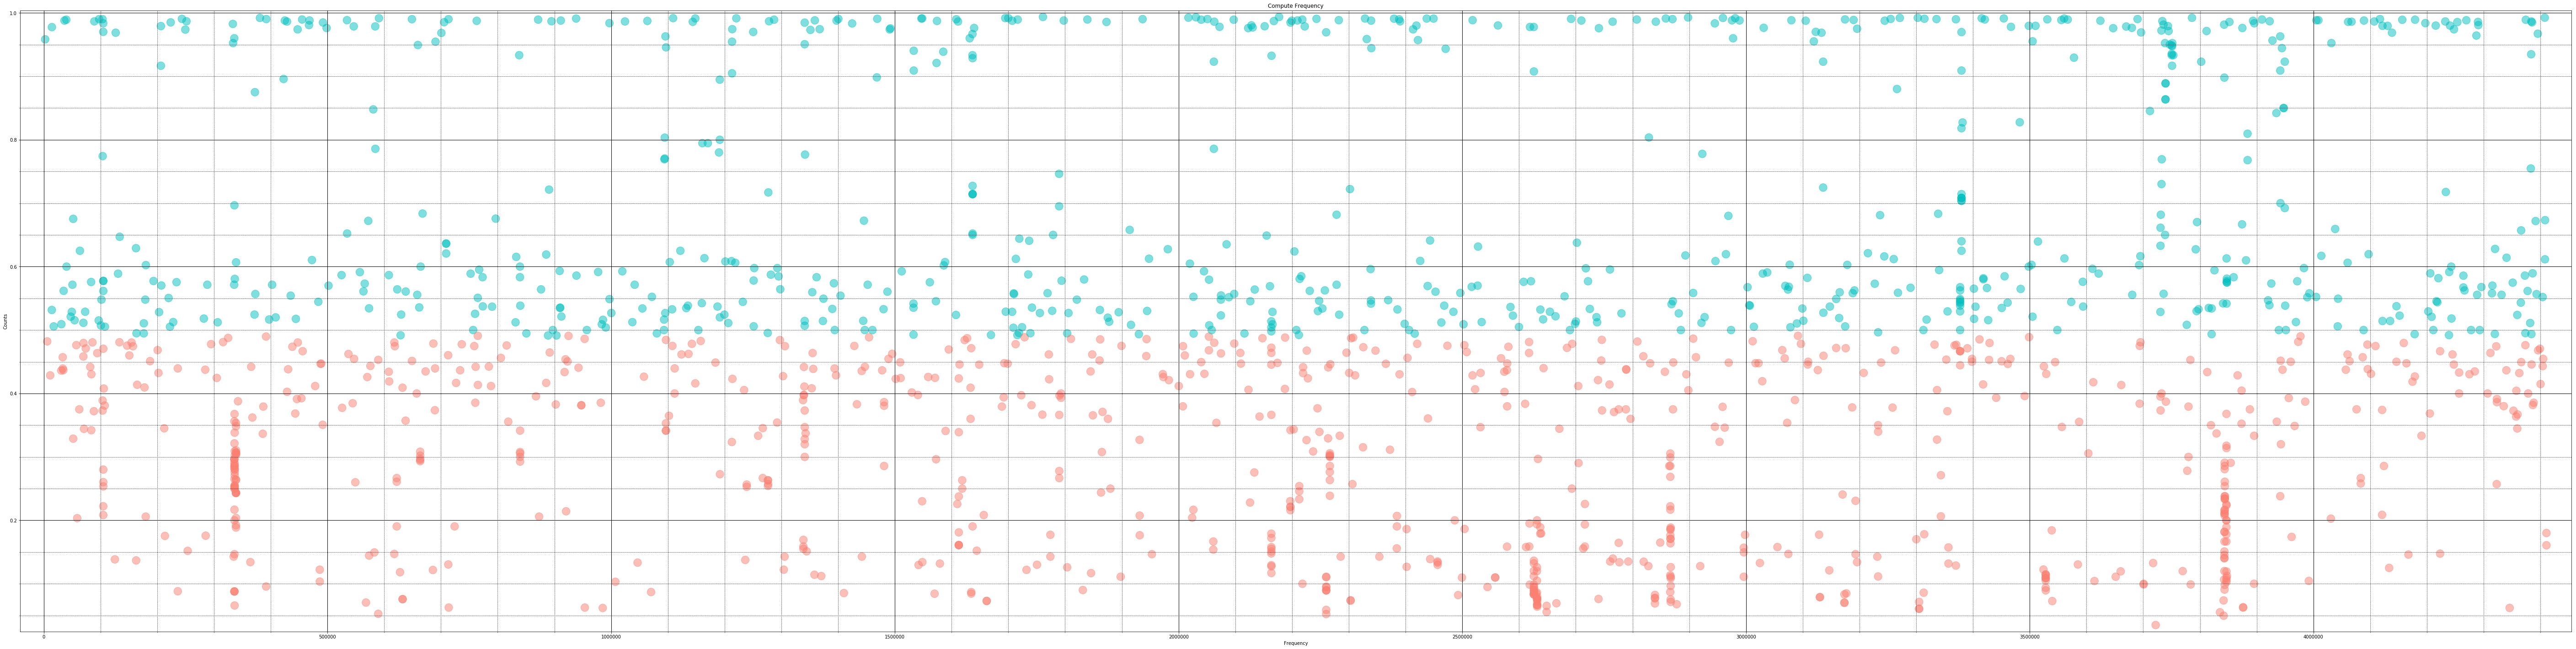

In [17]:
scatter_vcf_pos(vcf_PAIR15050_df)

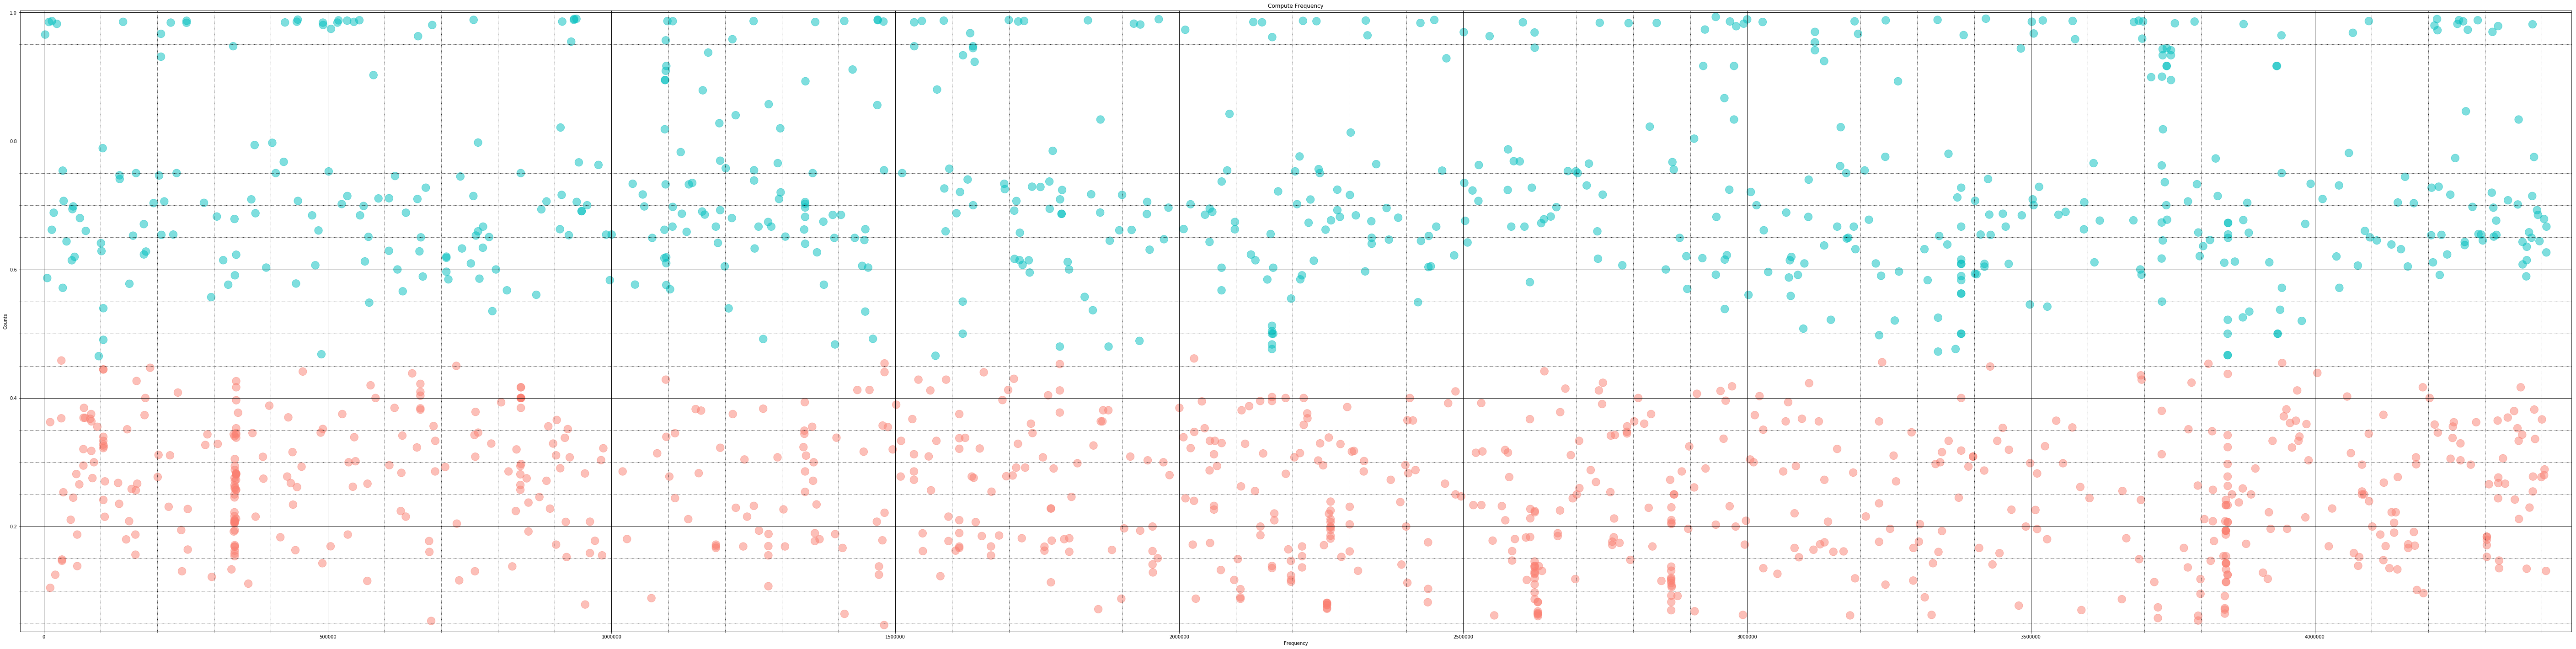

In [18]:
scatter_vcf_pos(vcf_PAIR18020_df)

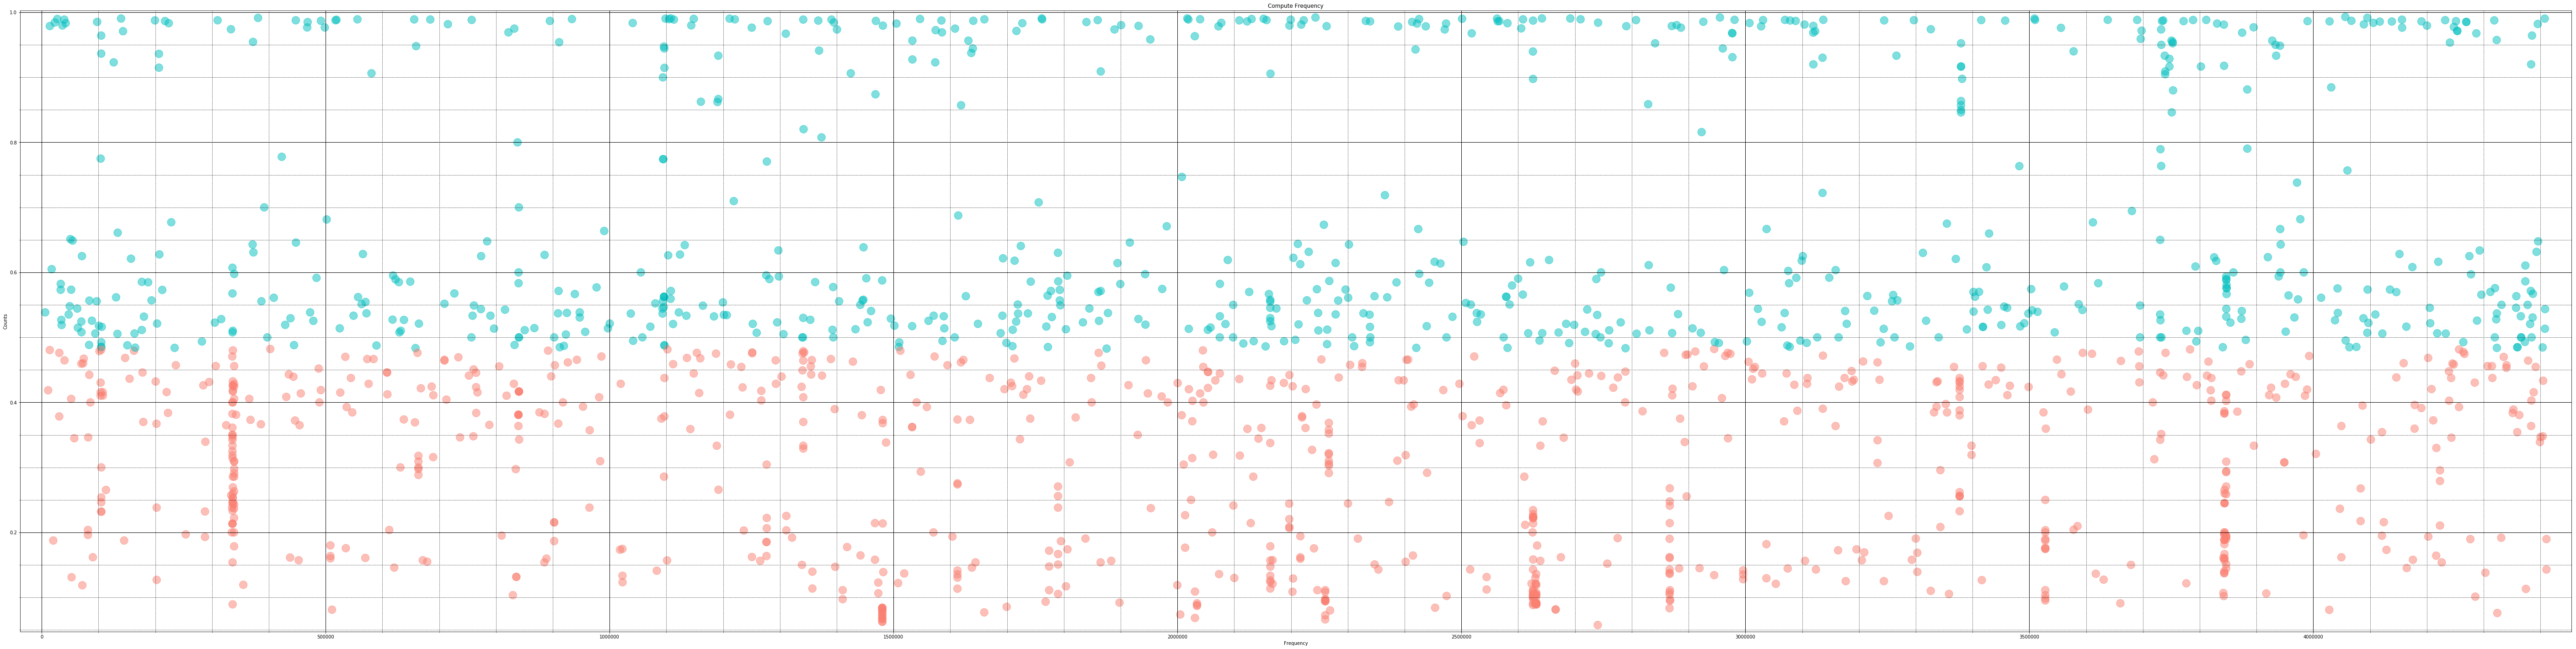

In [19]:
scatter_vcf_pos(vcf_PAIR19010_df)

In [66]:
def create_bin(bin, max):
    for i in range(1, max, bin):
        print(i,i+bin-1)

In [70]:
vcf_PAIR18020_df.tail(10)

#CHROM      POS ID REF ALT  QUAL FILTER  \
2948  MTB_anc  4395387  .   G   A  1257   PASS   
2949  MTB_anc  4399936  .   G   T  1636   PASS   
2950  MTB_anc  4401753  .   G   T   633   PASS   
2951  MTB_anc  4403900  .   A   G   127   PASS   
2952  MTB_anc  4407110  .   G   C  2361   PASS   
2953  MTB_anc  4407588  .   C   T  4934   PASS   
2954  MTB_anc  4407970  .   G   A   645   PASS   
2955  MTB_anc  4408156  .   A   C   376   PASS   
2956  MTB_anc  4408920  .   G   A  2293   PASS   
2957  MTB_anc  4408923  .   T   C  2677   PASS   

                                           INFO     DP        AF   SB  \
2948       DP=44;AF=1.000000;SB=0;DP4=0,0,18,26   44.0  1.000000  0.0   
2949       DP=65;AF=0.892308;SB=0;DP4=4,3,29,29   65.0  0.892308  0.0   
2950        DP=33;AF=0.727273;SB=1;DP4=6,3,19,5   33.0  0.727273  1.0   
2951       DP=69;AF=0.115942;SB=3;DP4=29,32,5,3   69.0  0.115942  3.0   
2952       DP=76;AF=0.947368;SB=0;DP4=2,2,30,42   76.0  0.947368  0.0   
2953      DP=178;AF=1.000000;SB=0;DP4=0,0,93,85  178.0  1.000000  0.0   
2954  DP=249;AF=0.136546;SB=0;DP4=104,111,16,18  249.0  0.136546  0.0   
2955     DP=121;AF=0.173554;SB=0;DP4=34,66,6,15  121.0  0.173554  0.0   
2956       DP=84;AF=1.000000;SB=0;DP4=0,0,31,53   84.0  1.000000  0.0   
2957       DP=82;AF=1.000000;SB=0;DP4=0,0,30,52   82.0  1.000000  0.0   

                DP4   Fref   Rref  Fsample  Rsample  
2948      0,0,18,26    0.0    0.0     18.0     26.0  
2949      4,3,29,29    4.0    3.0     29.0     29.0  
2950       6,3,19,5    6.0    3.0     19.0      5.0  
2951      29,32,5,3   29.0   32.0      5.0      3.0  
2952      2,2,30,42    2.0    2.0     30.0     42.0  
2953      0,0,93,85    0.0    0.0     93.0     85.0  
2954  104,111,16,18  104.0  111.0     16.0     18.0  
2955     34,66,6,15   34.0   66.0      6.0     15.0  
2956      0,0,31,53    0.0    0.0     31.0     53.0  
2957      0,0,30,52    0.0    0.0     30.0     52.0

In [20]:
print(len(vcf_PAIR18020_df.index.values))

1988


In [21]:
print(vcf_PAIR18020_df.loc[2955,'POS'])

KeyError: 2955

In [22]:
def add_snp_distance(vcf_df):
    for index in vcf_df.index.values:
        if index > 0:
            vcf_df.loc[index,'snp_left_distance'] = vcf_df.loc[index,'POS'] - vcf_df.loc[index - 1,'POS']
        if index < (len(vcf_df.index.values) - 1):
            vcf_df.loc[index,'snp_right_distance'] = vcf_df.loc[index + 1,'POS'] - vcf_df.loc[index,'POS']
            
    return vcf_df

In [23]:
vcf_PAIR190_dist = add_snp_distance(vcf_PAIR19010_df)
vcf_PAIR180_dist = add_snp_distance(vcf_PAIR18020_df)
vcf_PAIR150_dist = add_snp_distance(vcf_PAIR15050_df)

In [24]:
vcf_PAIR180_dist.tail()

#CHROM      POS ID REF ALT  QUAL FILTER  \
1983  MTB_anc  4407588  .   C   T  3529   PASS   
1984  MTB_anc  4407970  .   G   A  1491   PASS   
1985  MTB_anc  4408156  .   A   C  1695   PASS   
1986  MTB_anc  4408920  .   G   A  1959   PASS   
1987  MTB_anc  4408923  .   T   C  1984   PASS   

                                        INFO     DP        AF   SB  \
1983   DP=101;AF=1.000000;SB=0;DP4=0,0,49,52  101.0  1.000000  0.0   
1984  DP=83;AF=0.626506;SB=5;DP4=17,14,21,31   83.0  0.626506  5.0   
1985  DP=81;AF=0.666667;SB=0;DP4=12,15,23,31   81.0  0.666667  0.0   
1986    DP=57;AF=1.000000;SB=0;DP4=0,0,28,29   57.0  1.000000  0.0   
1987    DP=58;AF=1.000000;SB=0;DP4=0,0,29,29   58.0  1.000000  0.0   

              DP4  Fref  Rref  Fsample  Rsample  snp_right_distance  \
1983    0,0,49,52   0.0   0.0     49.0     52.0               382.0   
1984  17,14,21,31  17.0  14.0     21.0     31.0               186.0   
1985  12,15,23,31  12.0  15.0     23.0     31.0               764.0   
1986    0,0,28,29   0.0   0.0     28.0     29.0                 3.0   
1987    0,0,29,29   0.0   0.0     29.0     29.0                 NaN   

      snp_left_distance  
1983              273.0  
1984              382.0  
1985              186.0  
1986              764.0  
1987                3.0

In [25]:
vcf_PAIR180_dist.head()

#CHROM    POS ID REF ALT  QUAL FILTER  \
0  MTB_anc   2532  .   C   T   910   PASS   
1  MTB_anc   6140  .   G   T  1346   PASS   
2  MTB_anc   9143  .   C   T  2304   PASS   
3  MTB_anc  11370  .   C   T   778   PASS   
4  MTB_anc  11425  .   A   C    89   PASS   

                                     INFO    DP        AF    SB          DP4  \
0    DP=29;AF=0.965517;SB=0;DP4=0,0,17,11  29.0  0.965517   0.0    0,0,17,11   
1  DP=75;AF=0.586667;SB=0;DP4=17,14,22,22  75.0  0.586667   0.0  17,14,22,22   
2    DP=67;AF=0.985075;SB=3;DP4=0,1,39,27  67.0  0.985075   3.0    0,1,39,27   
3  DP=80;AF=0.362500;SB=3;DP4=23,28,16,13  80.0  0.362500   3.0  23,28,16,13   
4   DP=86;AF=0.104651;SB=34;DP4=48,29,0,9  86.0  0.104651  34.0    48,29,0,9   

   Fref  Rref  Fsample  Rsample  snp_right_distance  snp_left_distance  
0   0.0   0.0     17.0     11.0              3608.0                NaN  
1  17.0  14.0     22.0     22.0              3003.0             3608.0  
2   0.0   1.0     39.0     27.0              2227.0             3003.0  
3  23.0  28.0     16.0     13.0                55.0             2227.0  
4  48.0  29.0      0.0      9.0              2035.0               55.0

In [26]:
vcf_PAIR180_dist['snp_left_distance'].describe()

count     1987.000000
mean      2217.609965
std       2777.836258
min          0.000000
25%        263.500000
50%       1236.000000
75%       3168.500000
max      27856.000000
Name: snp_left_distance, dtype: float64

In [27]:
def filter_by_distance(vcf_dist_df, distance):
    vcf_df_filtered_distance = vcf_dist_df[((vcf_dist_df['snp_right_distance'] > distance) | (vcf_dist_df['snp_left_distance'] > distance))]
    return vcf_df_filtered_distance

In [28]:
vcf_PAIR190_dist_filtered = filter_by_distance(vcf_PAIR190_dist, 1500)
vcf_PAIR180_dist_filtered = filter_by_distance(vcf_PAIR180_dist, 1500)
vcf_PAIR150_dist_filtered = filter_by_distance(vcf_PAIR150_dist, 1500)

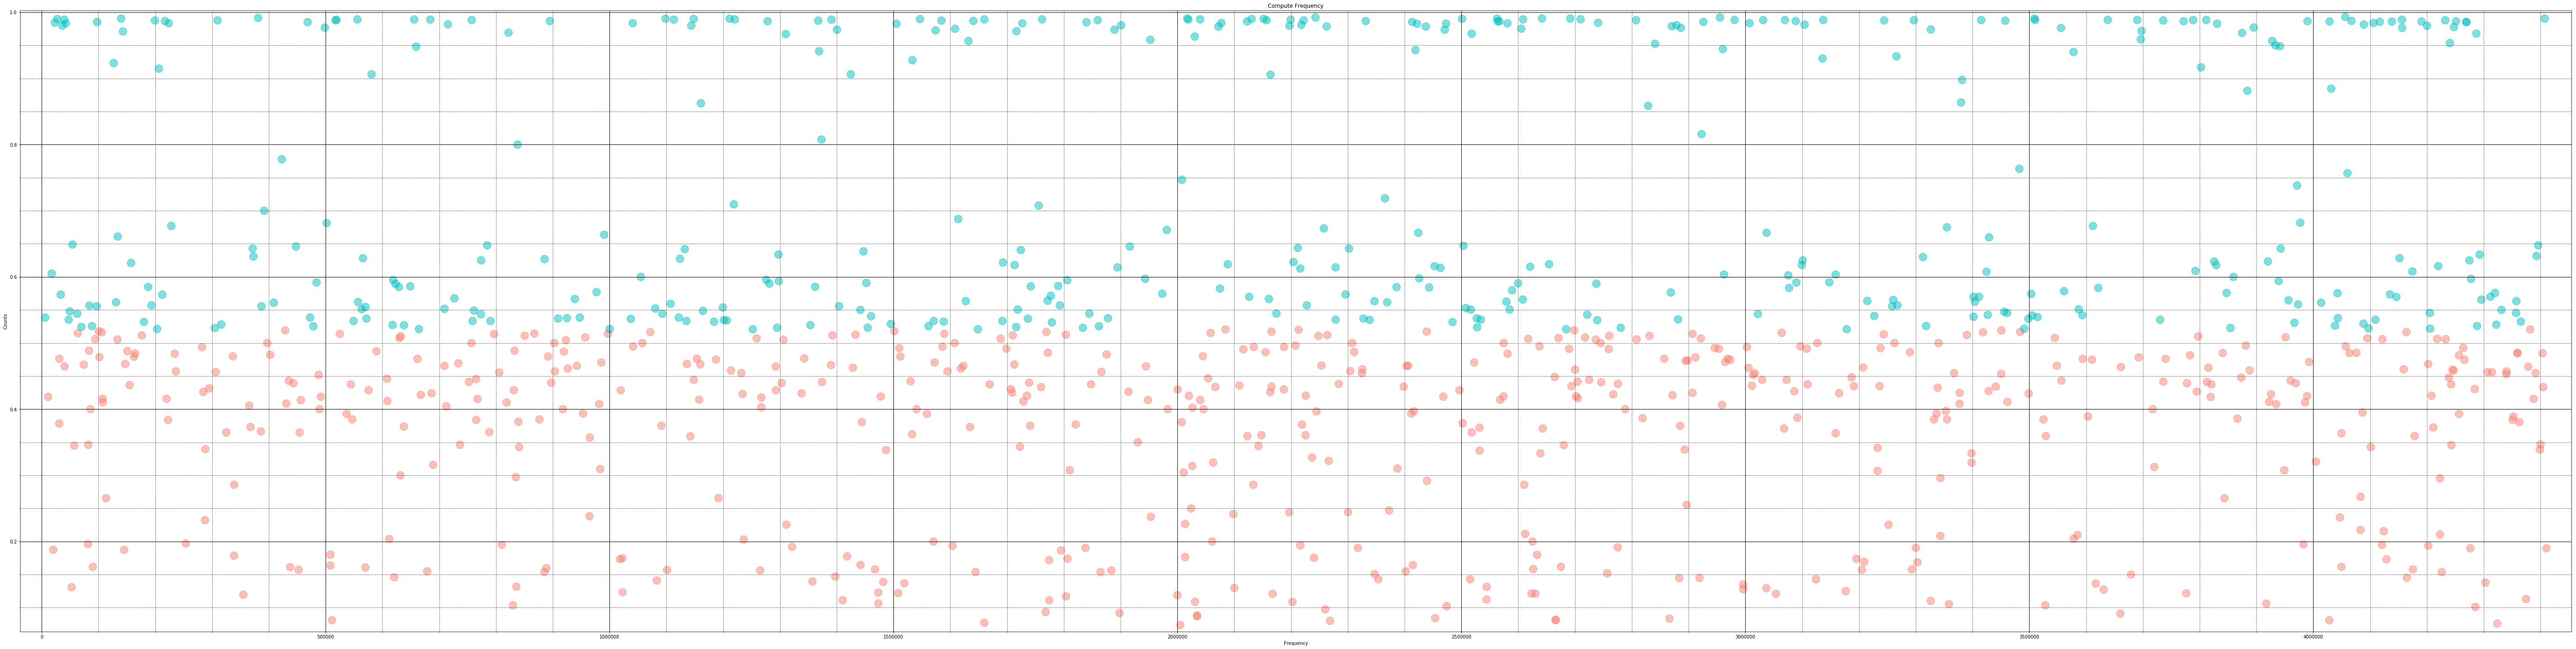

In [29]:
scatter_vcf_pos(vcf_PAIR190_dist_filtered)

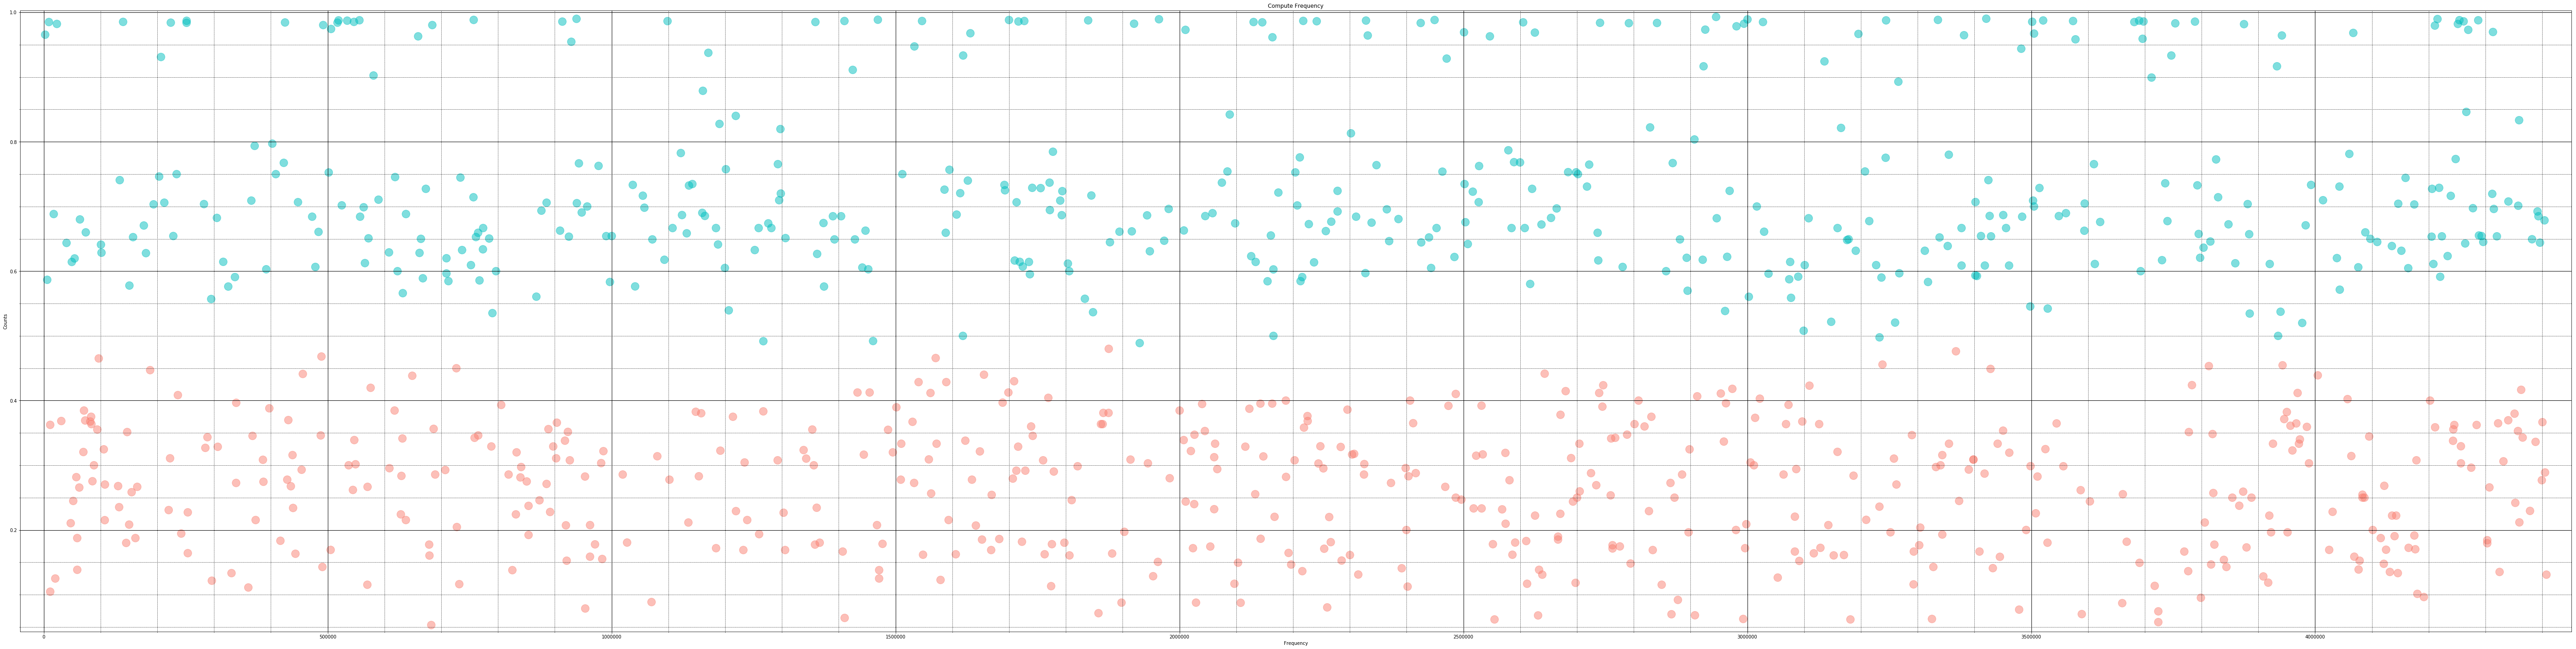

In [30]:
scatter_vcf_pos(vcf_PAIR180_dist_filtered)

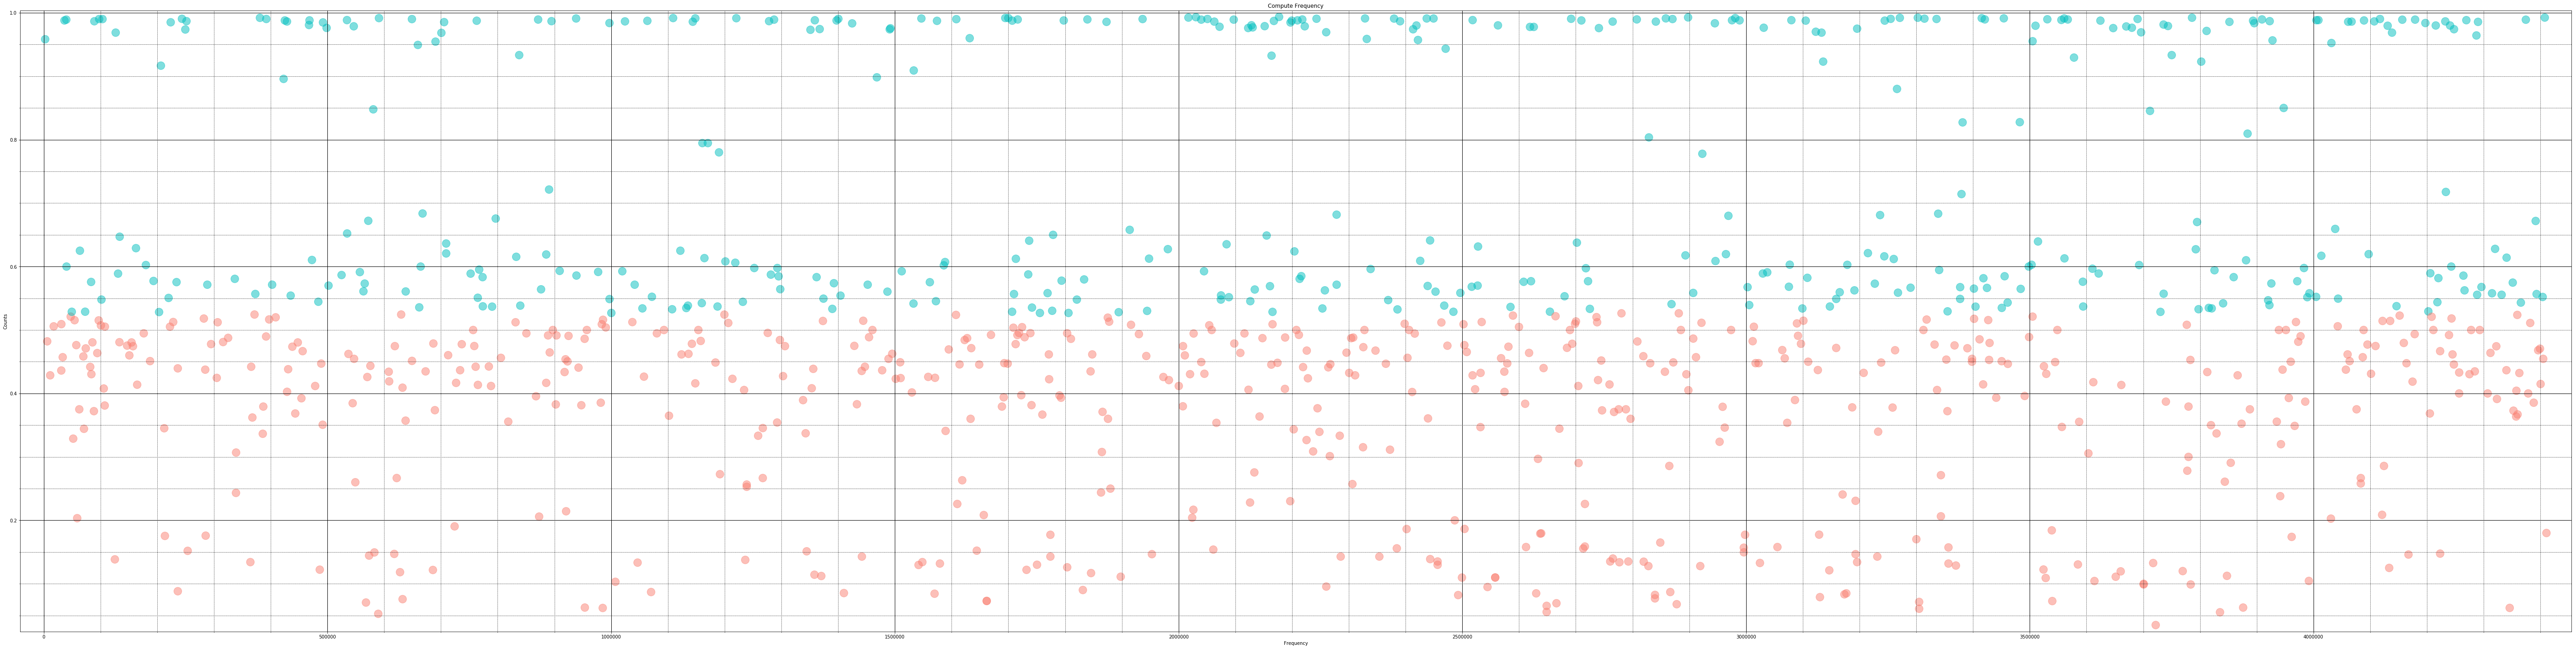

In [31]:
scatter_vcf_pos(vcf_PAIR150_dist_filtered)

In [32]:
vcf_PAIR150_dist_filtered['snp_right_distance'].dropna().describe()

count     1294.000000
mean      3214.286708
std       3097.649642
min          1.000000
25%       1029.750000
50%       2353.000000
75%       4390.750000
max      27856.000000
Name: snp_right_distance, dtype: float64

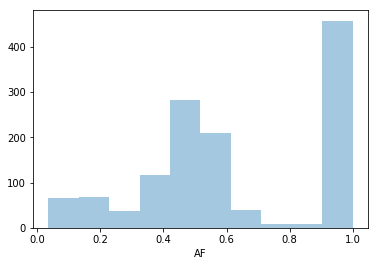

In [33]:
x = vcf_PAIR150_dist_filtered['AF']
sns.distplot(x, kde=False, rug=False)

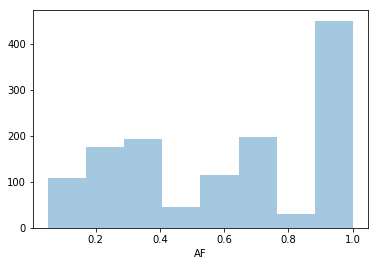

In [34]:
x = vcf_PAIR180_dist_filtered['AF']
sns.distplot(x, kde=False, rug=False)

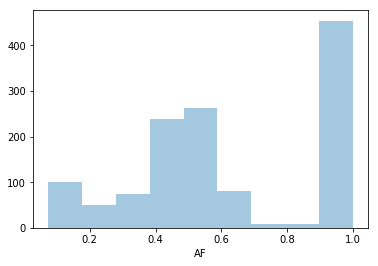

In [35]:
x = vcf_PAIR190_dist_filtered['AF']
sns.distplot(x, kde=False, rug=False)